## 1) Imports
- Load core libraries
- Connect to DuckDB

In [4]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
 
con = duckdb.connect("data/processed/nba.duckdb")

Matplotlib is building the font cache; this may take a moment.


## 2) Load & Filter Career Metrics

-Select career‐level WS/48 delta view and filter out players with
 fewer than **1,000 regular-season minutes** and **500 playoff minutes**
 to ensure stable per-48 metrics.

In [2]:
df = con.sql("""
SELECT *
FROM v_player_career
WHERE reg_mp >= 1000
  AND po_mp  >=  500
""").df()

con.close()   

In [3]:
print("Total players:", len(df))

Total players: 500


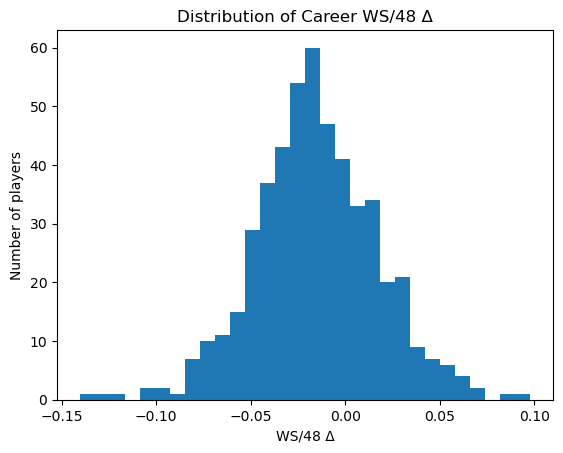

In [5]:
plt.hist(df["ws48_diff"], bins=30)
plt.title("Distribution of Career WS/48 Δ")
plt.xlabel("WS/48 Δ")
plt.ylabel("Number of players")
plt.show()

In [6]:
p5, p95 = df["ws48_diff"].quantile([0.05, 0.95])
print("5th percentile:", p5, " 95th percentile:", p95)


5th percentile: -0.06853946372694297  95th percentile: 0.03602515131121321
